## Importing Necessary Modules

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

dataset_path = "/content/data.csv"
df = pd.read_csv(dataset_path)

df.drop(columns=['emp_id'], inplace=True)
X = df.drop(columns=['risk_score'])
y = df['risk_score']

## Spliting the Dataset

In [2]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Finding train and test accuracy with Euclidean,Manhattan,Minkowski distance

In [3]:
def evaluate_knn_classifier(X_train, X_test, y_train, y_test, n_neighbors, distance_metric):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance_metric)
    knn_classifier.fit(X_train, y_train)
    train_pred = knn_classifier.predict(X_train)
    test_pred = knn_classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    return train_accuracy, test_accuracy

n_neighbors = 3
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in distance_metrics:
    train_acc, test_acc = evaluate_knn_classifier(X_train, X_test, y_train, y_test, n_neighbors, metric)
    print(f"Distance Metric: {metric}")
    print(f"Train Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
    print()


Distance Metric: euclidean
Train Accuracy: 0.3341477034761971
Test Accuracy: 0.0008375209380234506

Distance Metric: manhattan
Train Accuracy: 0.3338684908557867
Test Accuracy: 0.0008375209380234506

Distance Metric: minkowski
Train Accuracy: 0.3341477034761971
Test Accuracy: 0.0008375209380234506



## Optimal K value:

In [4]:
def find_optimal_k(X_train, X_test, y_train, y_test, max_k, distance_metric):
    best_k = 0
    best_test_accuracy = 0
    for k in range(1, max_k + 1):
        _, test_acc = evaluate_knn_classifier(X_train, X_test, y_train, y_test, k, distance_metric)
        if test_acc > best_test_accuracy:
            best_test_accuracy = test_acc
            best_k = k
    return best_k, best_test_accuracy

# Find optimal K value
max_k = 12
optimal_k, optimal_test_accuracy = find_optimal_k(X_train, X_test, y_train, y_test, max_k, 'euclidean')
print(f"Optimal K value: {optimal_k}")
print(f"Test Accuracy with Optimal K: {optimal_test_accuracy}")

Optimal K value: 10
Test Accuracy with Optimal K: 0.0013958682300390843


## Rebuild KNN classifier with The Optimal K: (i.e. find the best clusetering)

In [5]:
optimal_knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
optimal_knn_classifier.fit(X_train, y_train)



knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors
knn_regressor.fit(X_train, y_train)
y_pred_regression = knn_regressor.predict(X_test)
mse_regression = mean_squared_error(y_test, y_pred_regression)
print(f"Mean Squared Error (Regression): {mse_regression}")

Mean Squared Error (Regression): 235494991.5410385


## Visualize the Mean Square Error

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(train_mse_reg, label='Train MSE')
plt.plot(test_mse_reg, label='Test MSE')
plt.title('Train and Test Mean Squared Error (Regression)')
plt.xlabel('Model configurations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(train_accuracy_cls, label='Train Accuracy')
plt.plot(test_accuracy_cls, label='Test Accuracy')
plt.title('Train and Test Accuracy (Classification)')
plt.xlabel('Model configurations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

knn_cls_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_cls_optimal.fit(X_train_scaled, y_train)
y_pred_cls = knn_cls_optimal.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_cls)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

NameError: name 'train_mse_reg' is not defined

<Figure size 800x600 with 0 Axes>

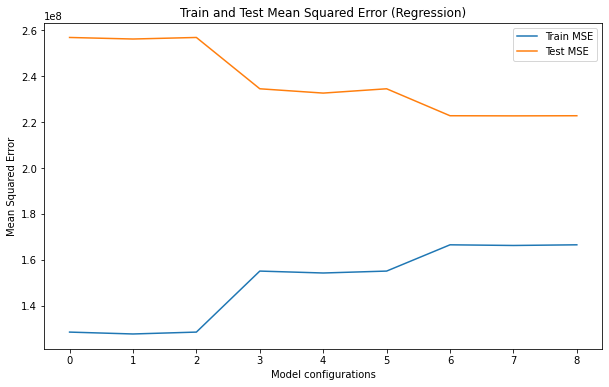